In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)

### In Random walk, there is an equal chance of going up or down by a random number.We usually recognize random walk when we see sudden changes and long periods with a positive or a negative trend

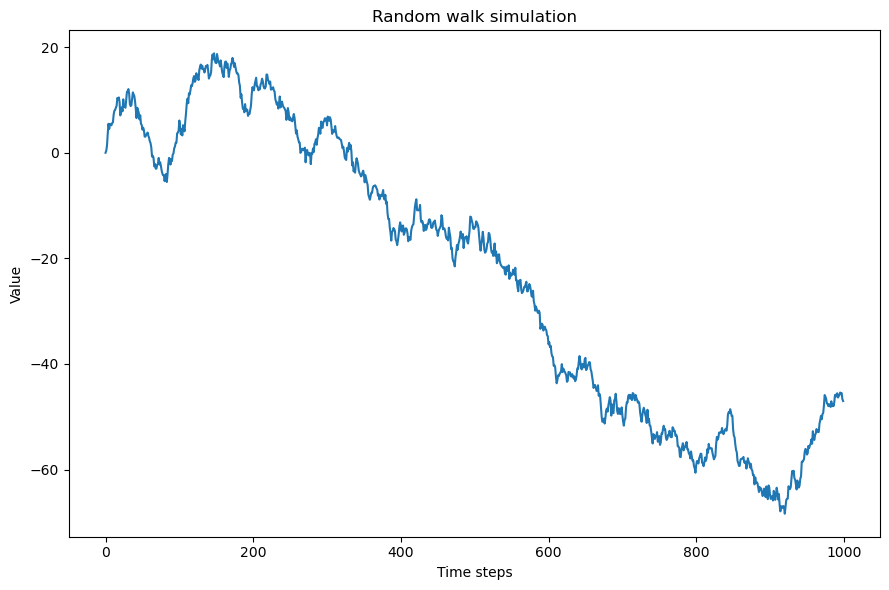

In [4]:
np.random.seed(0)

steps =  np.random.randn(1000)
steps[0] = 0

random_walk = np.cumsum(steps)

fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel("Time steps")
ax.set_ylabel("Value")
ax.set_title("Random walk simulation")

plt.tight_layout()
plt.show()

In [5]:
np.cumsum(steps)

array([ 0.00000000e+00,  4.00157208e-01,  1.37889519e+00,  3.61978839e+00,
        5.48734638e+00,  4.51006850e+00,  5.46015692e+00,  5.30879971e+00,
        5.20558086e+00,  5.61617936e+00,  5.76022293e+00,  7.21449644e+00,
        7.97553416e+00,  8.09720918e+00,  8.54107241e+00,  8.87474674e+00,
        1.03688258e+01,  1.01636676e+01,  1.04767353e+01,  9.62263951e+00,
        7.06964970e+00,  7.72326829e+00,  8.58770449e+00,  7.84553947e+00,
        1.01152941e+01,  8.66092842e+00,  8.70668694e+00,  8.51950309e+00,
        1.00522823e+01,  1.15216411e+01,  1.16765885e+01,  1.20547510e+01,
        1.11669653e+01,  9.18616880e+00,  8.83825665e+00,  8.99460562e+00,
        1.02248963e+01,  1.14272762e+01,  1.10399493e+01,  1.07376466e+01,
        9.68909362e+00,  8.26907568e+00,  6.56280549e+00,  8.51358089e+00,
        8.00392870e+00,  7.56585440e+00,  6.31305904e+00,  7.09054940e+00,
        5.47665155e+00,  5.26391127e+00,  4.36844471e+00,  4.75534721e+00,
        4.24454207e+00,  

### Random walk is a series whose first difference is stationary and uncorrelated.


### A Series is said to be stationary when it has constant statistical properties over time.

### Mean, variance and autocorrelation don't change over time.

### Models like MA, AR, ARMA assume stationary.

# Transformations:

### `Differencing` - it means calculating the changes between consecutive timesteps.

### ADF test determines if series is stationary by testing the presence of unit root. If unit root is present the series is `non stationary`

### if the value of `alpha is between -1 and 1`, the series is `stationary`

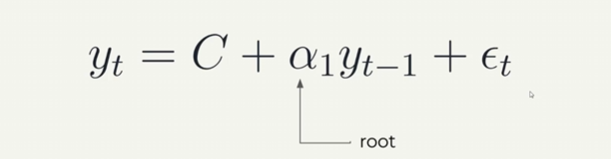

In [6]:
np.zeros(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
def simulate_timeseries(is_stationary):
    np.random.seed(0)
    process = np.zeros(500)

    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 0
    
    for i in range(len(process)):
        if i+1 < len(process):
            process[i+1] = alpha * process[i] + np.random.randn()
        else:
            break
    return process

In [11]:
stationary = simulate_timeseries(True)
non_stationary = simulate_timeseries(False)

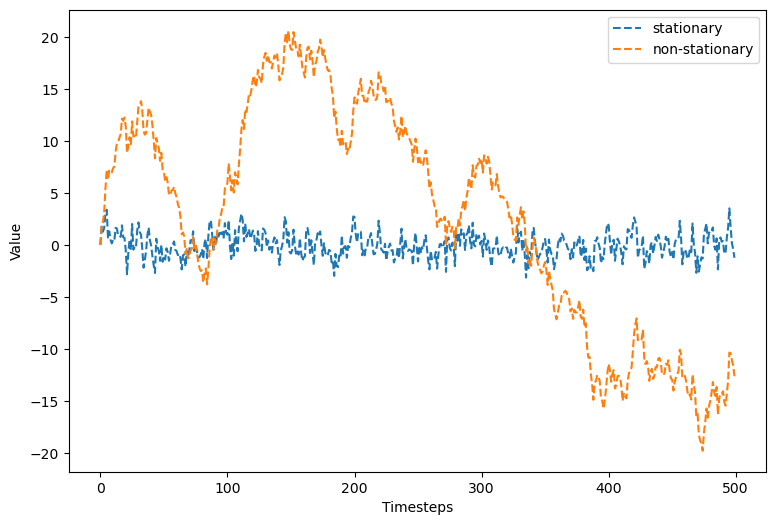

In [12]:
fig, ax = plt.subplots()

ax.plot(stationary, ls = "--", label = "stationary")
ax.plot(non_stationary, ls = "--", label = "non-stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
plt.legend()

plt.show()

In [9]:
np.random.randn()

0.10471402943328433

In [13]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []
    
    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
    
    return mean_func

In [14]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

c:\Users\thara\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\thara\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


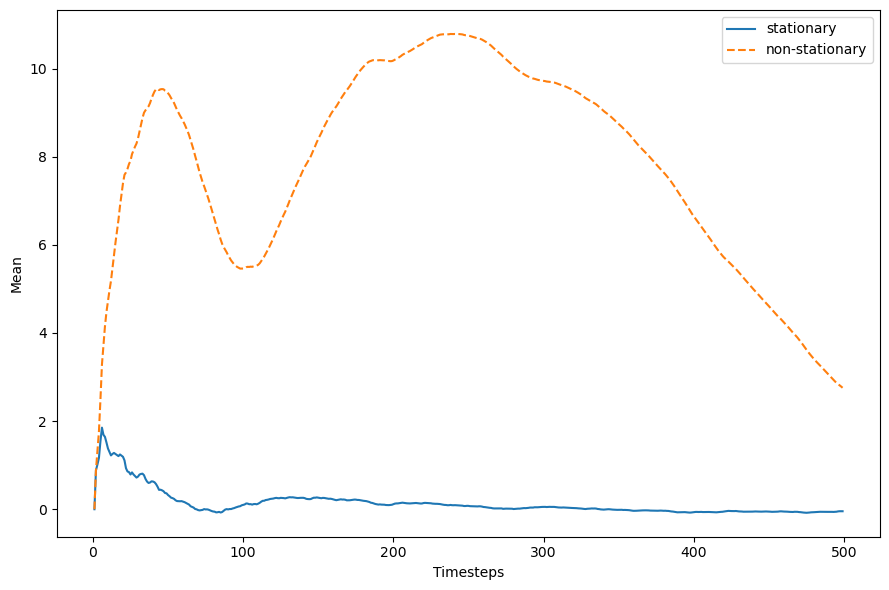

In [15]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

In [16]:
def var_over_time(process: np.array) -> np.array:
    var_func = []
    
    for i in range(len(process)):
        var_func.append(np.var(process[:i]))
    
    return var_func

In [17]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

c:\Users\thara\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\thara\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\thara\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


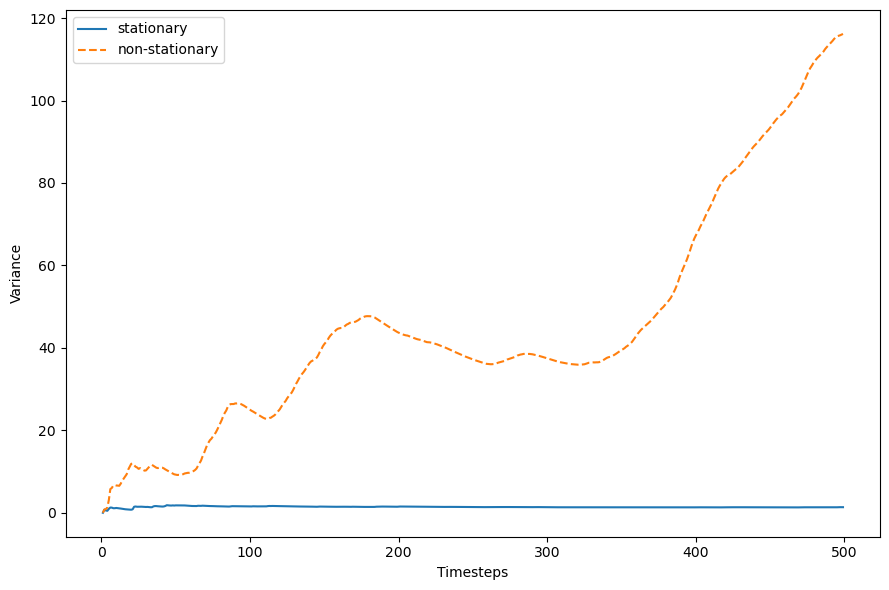

In [18]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()

In [19]:
from statsmodels.tsa.stattools import adfuller

ADF_test = adfuller(random_walk)

print(f"ADF-Test statistic: {ADF_test[0]}")
print(f"P-value: {ADF_test[1]}")

ADF-Test statistic: -0.5437433594783749
P-value: 0.8831939389121152


In [20]:
diff_random_walk = np.diff(random_walk, n=1)

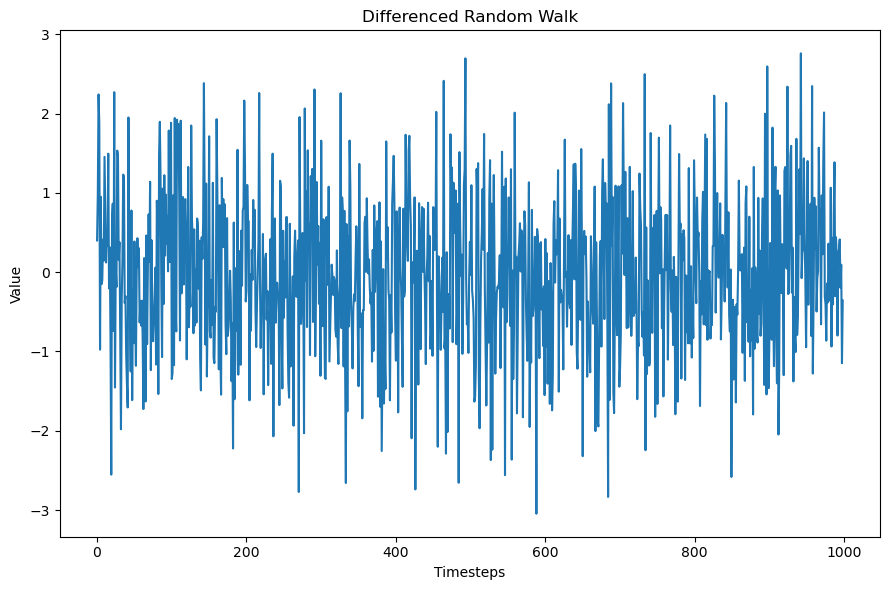

In [21]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

In [22]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -32.4248872069162
p-value: 0.0


### Autocorrelation is the correlation of the timeseries with itself. `Plotting ACF is useful if the series is stationary.`

### `Correlation at lag 0 is always 1`

### In ACF Plot, the blue band gives us a range to determine `if Autocorrelation is significantly different from zero or not.`

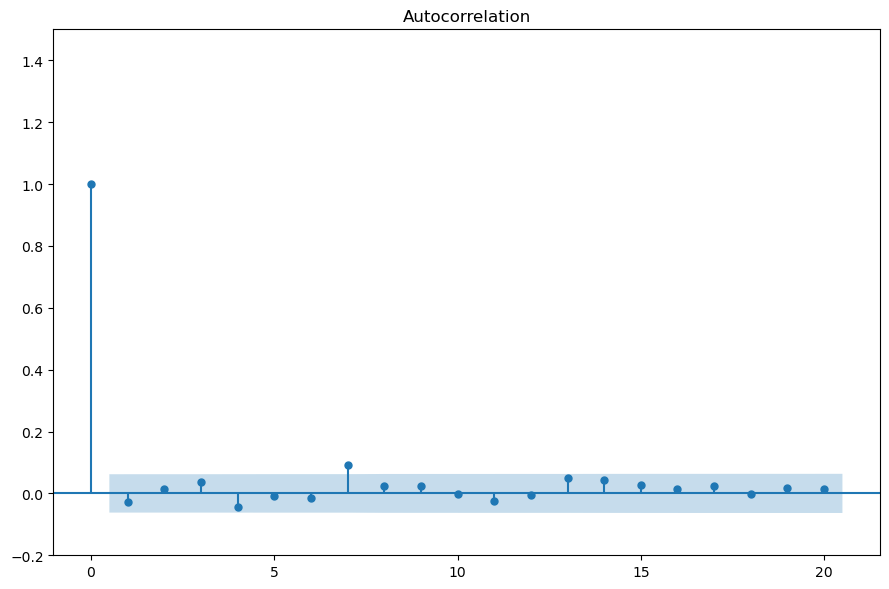

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff_random_walk, lags=20)

plt.ylim(-0.2,1.5)
plt.tight_layout()

### When there is a `trend`, `Autocorrelation is high for smaller lags` and gradually decreases as the lag increases

### It is clear that Autocorrelation is `always 1 at lag 0` and all other `Auto-correlation coefficients are not significantly different from zero starting from 1.`

### Hence, we conclude the given time series is a `random walk`

# `Forecasting a random walk`

## Forecasting a random walk is pretty much complicated since the time series moves randomly. we are pretty much stuck with using baseline models because
## `there are no models that can possibly predict random walk`
## `there is no model to apply in those situations`

In [26]:
import pandas as pd
df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]

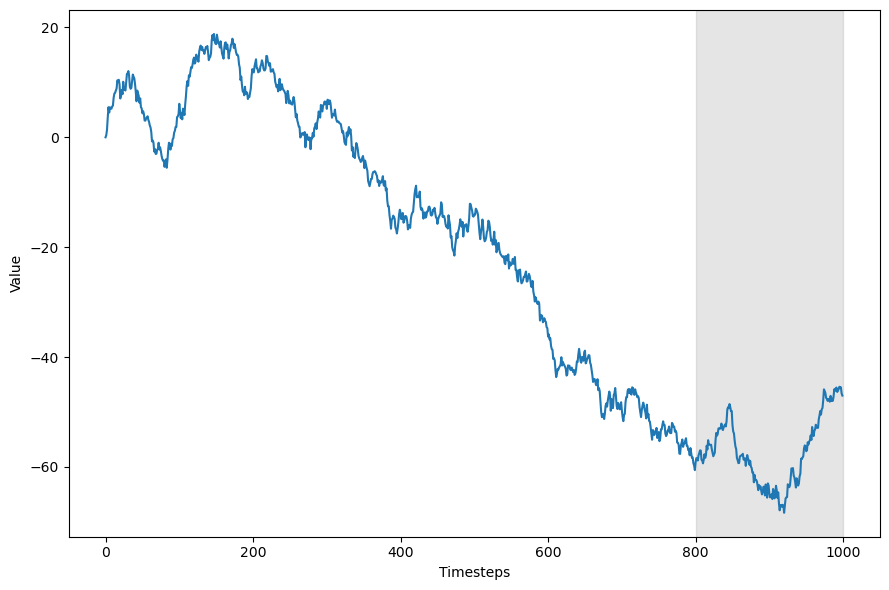

In [27]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()

In [31]:
mean = np.mean(train.values)

test.loc[:, 'pred_mean'] = mean

test.head()

C:\Users\thara\AppData\Local\Temp\ipykernel_13220\2799055929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = mean


,value,pred_mean
800,-59.178089,-14.296577
801,-58.392285,-14.296577
802,-58.449755,-14.296577
803,-58.840972,-14.296577
804,-57.900054,-14.296577


In [37]:
last_value = train.iloc[-1].values[0]

test.loc[:, 'pred_last'] = last_value

test.head()

C:\Users\thara\AppData\Local\Temp\ipykernel_13220\4155455773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last_value


,value,pred_mean,pred_last
800,-59.178089,-14.296577,-60.589261
801,-58.392285,-14.296577,-60.589261
802,-58.449755,-14.296577,-60.589261
803,-58.840972,-14.296577,-60.589261
804,-57.900054,-14.296577,-60.589261


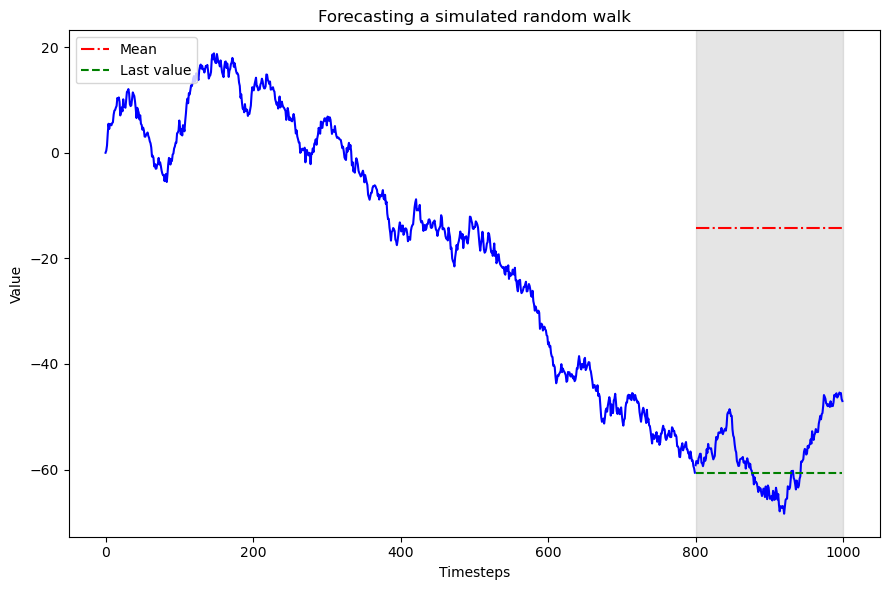

In [38]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
# ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting a simulated random walk')

plt.tight_layout()

In [39]:
from sklearn.metrics import mean_absolute_error

mae_mean = mean_absolute_error(test['value'], test['pred_mean'])
mae_last = mean_absolute_error(test['value'], test['pred_last'])
# mae_drift = mean_absolute_error(test['value'], test['pred_drift'])

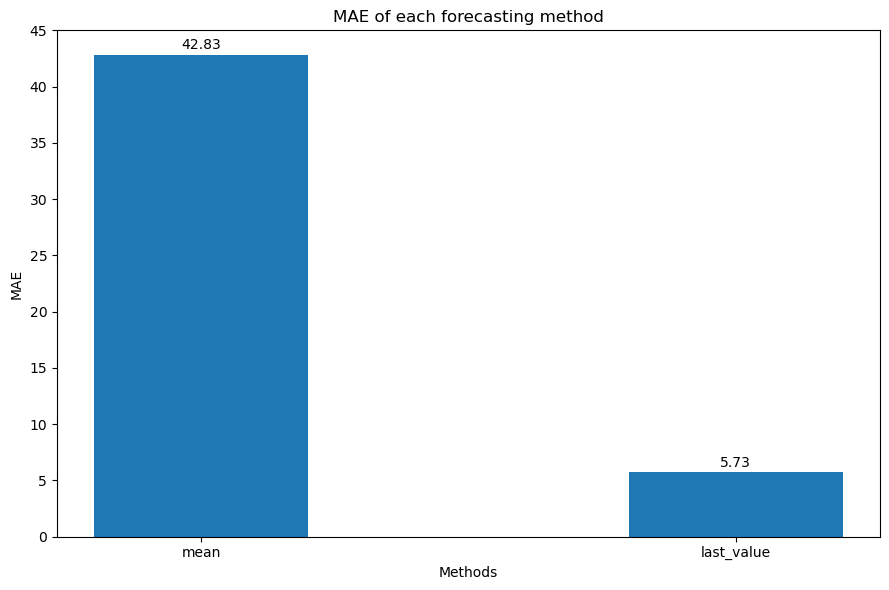

In [40]:
fig, ax = plt.subplots()

x = ['mean', 'last_value']
y = [mae_mean, mae_last]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 45)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

In [41]:
df_shift = df.shift(periods=1)

df_shift.head()

,value
0,NaN
1,0.000000
2,0.400157
3,1.378895
4,3.619788


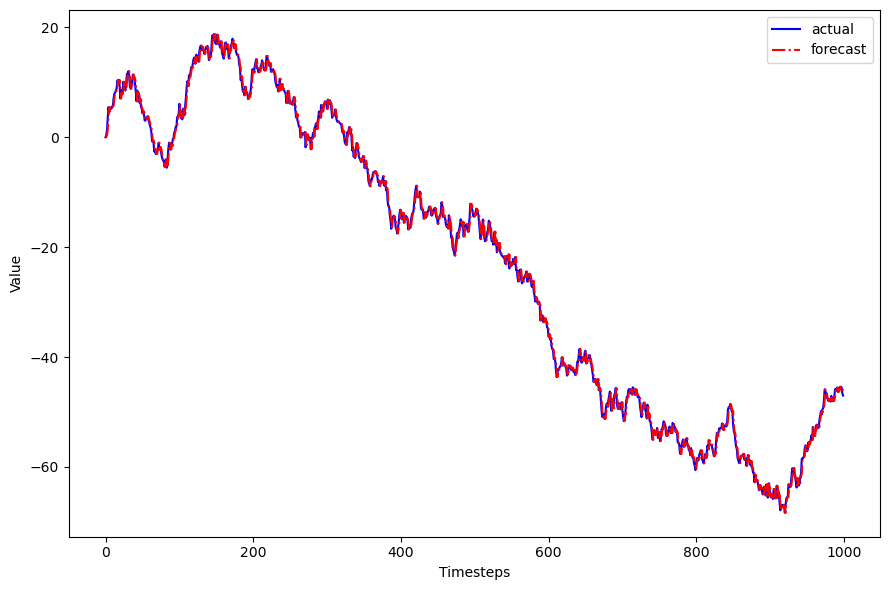

In [42]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc='best')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [43]:
mae_one_step = mean_absolute_error(test['value'], df_shift[800:])

mae_one_step

0.7397491936153824

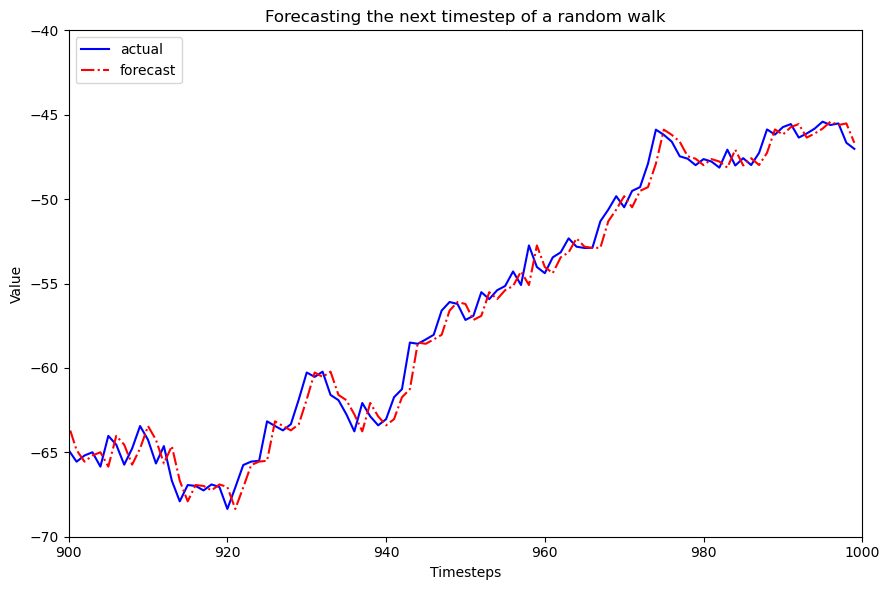

In [44]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(-70, -40)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting the next timestep of a random walk')

plt.tight_layout()

#### Forecasting a random walk is bit `deceitful` especially when using `baseline models`. All we did is just the repeat the `same value into the future`